<a href="https://colab.research.google.com/github/DucTran2810/Final-Project/blob/main/Training_Gender_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
125/125 [==============================] - 32s 150ms/step - loss: 0.9240 - acc: 0.5014 - val_loss: 0.6834 - val_acc: 0.6210
Epoch 2/50
125/125 [==============================] - 19s 150ms/step - loss: 0.6620 - acc: 0.6159 - val_loss: 0.6247 - val_acc: 0.6910
Epoch 3/50
125/125 [==============================] - 18s 142ms/step - loss: 0.5394 - acc: 0.7420 - val_loss: 0.3648 - val_acc: 0.8360
Epoch 4/50
125/125 [==============================] - 18s 143ms/step - loss: 0.3424 - acc: 0.8583 - val_loss: 0.2540 - val_acc: 0.8950
Epoch 5/50
125/125 [==============================] - 18s 144ms/step - loss: 0.2826 - acc: 0.8881 - val_loss: 0.2475 - val_acc: 0.9095
Epoch 6/50
125/125 [==============================] - 18s 145ms/step - loss: 0.2682 - acc: 0.8909 - val_loss: 0.2282 - val_acc: 0.9070
Epoch 7/50
125/125 [==============================] - 18s 145ms/step - loss: 0.2420 - acc: 0.9016 - val_loss: 0.2350 - val_acc: 0.9100
Epoch 8/50
125/125 [==============================] - 1

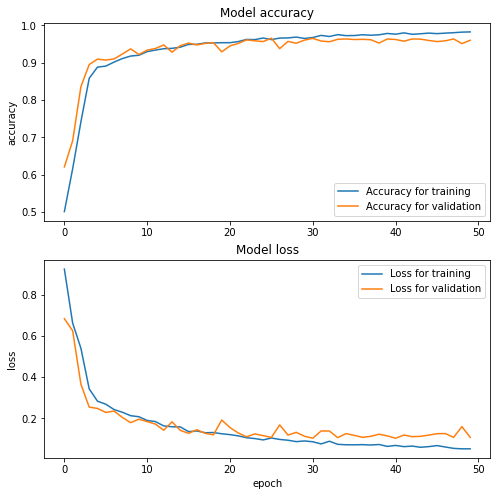

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
# Load Data 
filename='./drive/MyDrive/Data_for_Training_Gender_1.pickle'
with open(filename, "rb") as f:
    (x_train, y_train) = pickle.load(f)
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train,2)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
#Khởi tạo model
model = Sequential()

#1st CNN layer
model.add(Conv2D(32, (5,5), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(64, (5,5), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64, (5,5), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
#5th CNN layer
model.add(Conv2D(512, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())

#Fully connected layer 1st
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.25))

#Fully connected layer 2nd
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.2)
model.save('./model_gender_official.h5')
#Draw
f1 = history.history['acc']
val_f1 = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Accuracy for training')
plt.plot(val_f1, label='Accuracy for validation')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss for training')
plt.plot(val_loss, label='Loss for validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Model loss')

plt.show()